In [1]:
import pandas as pd
import numpy as np

In [2]:
global_temp = pd.read_csv("Weather.csv")

In [3]:
global_temp.shape

(3192, 9)

In [4]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [6]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### finding out missing values

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


<AxesSubplot:>

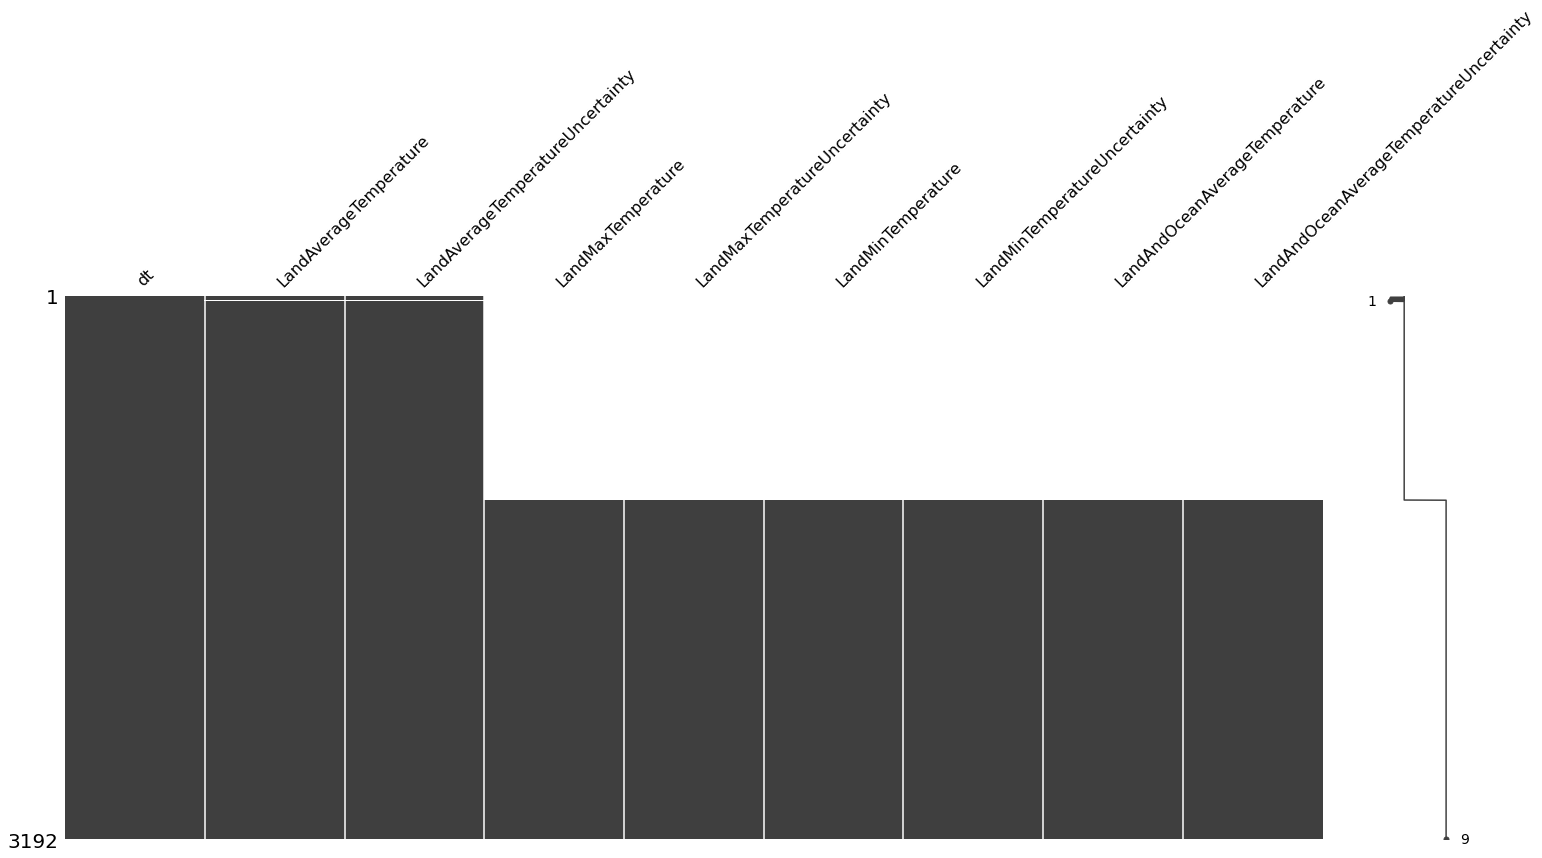

In [7]:
import missingno as msno

print(global_temp.isnull().sum())

msno.matrix(global_temp)



In [8]:
global_temp.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,01-08-2015,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,01-09-2015,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,01-10-2015,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,01-11-2015,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,01-12-2015,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [9]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [10]:
#converting the temperature from celcius to fahrenhite

def convertfar(x):
    x = (x * 1.8) + 32
    return float(x)


global_temp["LandAverageTemperature"] = global_temp["LandAverageTemperature"].apply(convertfar)

global_temp["LandMaxTemperature"] = global_temp["LandMaxTemperature"].apply(convertfar)


global_temp["LandMinTemperature"] = global_temp["LandMinTemperature"].apply(convertfar)

global_temp["LandAndOceanAverageTemperature"] = global_temp["LandAndOceanAverageTemperature"].apply(convertfar)


###

global_temp["LandAverageTemperatureUncertainty"] = global_temp["LandAverageTemperatureUncertainty"].apply(convertfar)

global_temp["LandMaxTemperatureUncertainty"] = global_temp["LandMaxTemperatureUncertainty"].apply(convertfar)


global_temp["LandMinTemperatureUncertainty"] = global_temp["LandMinTemperatureUncertainty"].apply(convertfar)

global_temp["LandAndOceanAverageTemperatureUncertainty"] = global_temp["LandAndOceanAverageTemperatureUncertainty"].apply(convertfar)



In [11]:
#converting the dt to datetime formate

global_temp["dt"] = pd.to_datetime(global_temp["dt"])


global_temp["Year"] = global_temp["dt"].dt.year


global_temp.drop("dt", axis = 1, inplace = True)

global_temp = global_temp.set_index(["Year"])

### Correlationa and getting rid fo the high cardinality data

<AxesSubplot:>

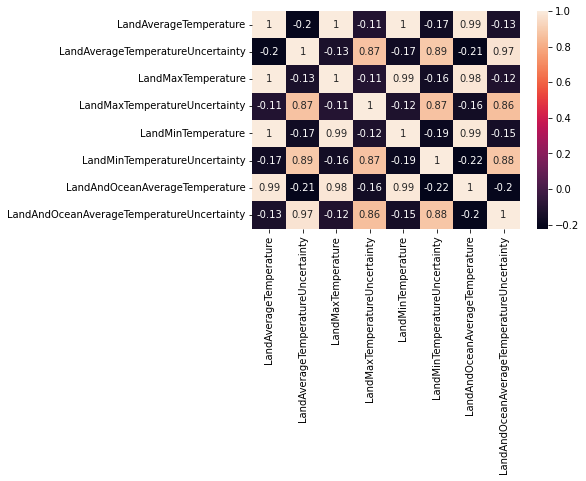

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = global_temp.corr()

sns.heatmap(corr, annot = True)


In [13]:
global_temp.drop(["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty" ], axis = 1, inplace = True )

<AxesSubplot:>

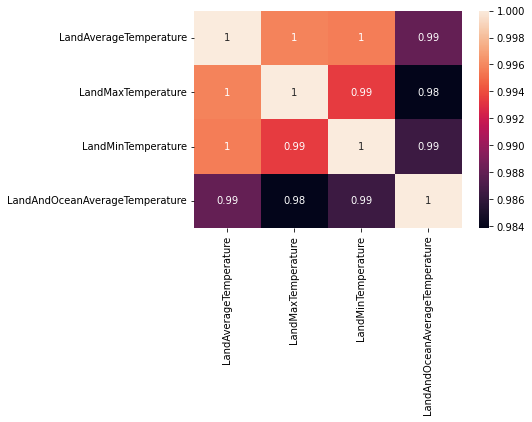

In [14]:
#Now we'll check again

corr = global_temp.corr()

sns.heatmap(corr, annot = True)

### Dealing with the missing data

In [15]:
#Since the temperature were not recorded at all, and if recorded it wasn't done accurately so theres
#no good imputing the missing data. Therefore we'll get rid of the data.


In [16]:

per = (global_temp.isnull().sum() / global_temp.isnull().count()).sort_values(ascending = False)

per

LandMaxTemperature                0.375940
LandMinTemperature                0.375940
LandAndOceanAverageTemperature    0.375940
LandAverageTemperature            0.003759
dtype: float64

In [17]:
global_temp.dropna(inplace = True)

In [18]:
global_temp.shape

(1992, 4)

### train test split

In [19]:
X = global_temp.copy()
y = X.pop("LandAndOceanAverageTemperature")


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(1593, 3)
(399, 3)
(1593,)
(399,)


### Baseline Mean Absolute Error

In [21]:
# Before we can make and evaluate any predictions on our machine learning model to predict weather,
# we need to establish a baseline, a sane metric that we hope to beat with our model. If our model
# cannot improve from the baseline then it will fail and we should try a different model or admit
# that machine learning is not suitable for our problem:

In [22]:
global_temp.dtypes

LandAverageTemperature            float64
LandMaxTemperature                float64
LandMinTemperature                float64
LandAndOceanAverageTemperature    float64
dtype: object

In [23]:
from sklearn.metrics import mean_squared_error

y_pred = [y_train.mean()]*len(y_train)

print(f"BAE:{round(mean_squared_error(y_train, y_pred), 5)}")

BAE:5.2502


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

forest = make_pipeline(SelectKBest(k = "all"), StandardScaler(), 
                       RandomForestRegressor(n_estimators = 100,
                                            max_depth = 50, 
                                            random_state = 64,
                                            n_jobs = -1))

forest.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=64))])

In [34]:
X_train.iloc[5, :]

LandAverageTemperature    36.0104
LandMaxTemperature        47.2730
LandMinTemperature        26.4200
Name: 1870, dtype: float64

In [25]:
from sklearn.metrics import mean_absolute_error

prediction = forest.predict(X_test)


score = mean_absolute_error(y_test, prediction)

score

0.24451443609022758

In [27]:
errors = abs(prediction - y_test)
mape = 100 * (errors/y_train)
accuracy = 100 - np.mean(mape)
print("Random Forest Model: ", round(accuracy, 2), "%")

Random Forest Model:  99.58 %


In [29]:
import pickle as pkl

In [30]:
pkl.dump(forest, open("model.pkl", "wb"))